# Lecture 2: Exploratory Data Analysis

CPSC 340: Machine Learning and Data Mining

The University of British Columbia

2018 Winter Term 1

In [73]:
# lecture imports / dependencies
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set(style="ticks")
from sklearn.feature_extraction.text import CountVectorizer
from skimage.io import imread, imshow
%autosave 0

Autosave disabled


## Admin

- Get a CS ugrad account: https://www.cs.ubc.ca/getacct/
- Course website: https://github.ugrad.cs.ubc.ca/CPSC340-2018W-T1/home
- Course Piazza sign-up: https://piazza.com/class/jhjgkk9un036np
- Tutorials start next week
- The lectures will be a mix of PowerPoint and jupyter notebook (this)
  - both will be available online
  - you can view the "static" notebook directly on GitHub
  - you can run the notebook locally and play around with it
  - the notebook covers very similar material to Mark's slides, which are also posted

## Typical steps of ML

1. Identify question / task
2. Collect data
3. Clean and preprocess data
4. Exploratory data anlysis
5. Feature and model selection
6. Train model
7. Evaluate and communicate results
8. Deploy working system

(but not necessarily in this order...)

Today we'll discuss steps (3) and (4)

## What does data look like?

Often, it is tabular (but certainly not always!).

In [74]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- Each row is an **example**.
- Each column is a **feature**.

## Types of features

- Categorical (e.g. `survived`, `embark_town`)
- Numerical (e.g. age, fare)
- Some are more ambiguous, like `pclass`: is this categorical or numerical?

Many of our methods are meant to work with numerical features. We can convert categorical to numerical.

In [75]:
pd.get_dummies(titanic, columns=["embarked"]).head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,embarked_C,embarked_Q,embarked_S
0,0,3,male,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,0,0,1
1,1,1,female,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,1,0,0
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,0,0,1
3,1,1,female,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,0,0,1
4,0,3,male,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,0,0,1


If we do this for all our features, we can now interpret objects as points in space.

In [76]:
titanic_num = pd.get_dummies(titanic, columns=["sex","embarked","fare","class","who","adult_male","deck","embark_town","alive","alone"])
titanic_num.shape

(891, 280)

- So we now have 891 objects and 280 features. 
- In other words, each object is a point in 280-dimensional space.
- This is why multivariable calculus is a prerequisite for CPSC 340.

### Other feature types: text data 

In [ ]:
text = "The University of British Columbia (UBC) is a public research university with campuses and facilities in British Columbia, Canada."

One approach: **bag of words** features. 

In [77]:
cv = CountVectorizer()
feat = cv.fit_transform([text])

In [78]:
for word, idx in cv.vocabulary_.items():
    print("%-14s%d" % (word, feat[0,idx]))

the           1
university    2
of            1
british       2
columbia      2
ubc           1
is            1
public        1
research      1
with          1
campuses      1
and           1
facilities    1
in            1
canada        1


- Bag of words ignores the order of words but still can work well.
- You can interpret each document as a point in space, compute distances.

### Other feature types: images

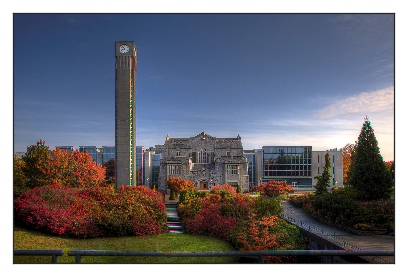

In [79]:
img = imread("https://upload.wikimedia.org/wikipedia/commons/8/86/Irving_K._Barber_Library.jpg")
plt.xticks([])
plt.yticks([])
imshow(img);

Photo credit: [Wikipedia: UBC](https://en.wikipedia.org/wiki/University_of_British_Columbia#/media/File:Irving_K._Barber_Library.jpg) by [CjayD](https://www.flickr.com/people/85424459@N08/), [CC BY 2.0](http://creativecommons.org/licenses/by/2.0).

In [80]:
img.shape

(1344, 2048, 3)

In [81]:
img[:2,:2,:]

array([[[45, 58, 90],
        [45, 59, 88]],

       [[45, 59, 88],
        [45, 59, 88]]], dtype=uint8)

In [82]:
img.flatten().shape

(8257536,)

- Now, again, the image is a point in space. 
- But now the space is 8,257,536-dimensional!
- We'll talk about this towards the end of the course.

## Data Cleaning

- ML+DM typically assume "clean" data.
- Ways that data might not be "clean":
  - Noise (e.g., distortion on phone)
  - Outliers (e.g., data entry or instrument error)
  - Missing values (no value available or not applicable)
  - Duplicated data (repetitions, or different storage formats)
  - Encodings (e.g., date-times in different formats)
  - Identity resolution (e.g., no reliable primary key across tables)
- Any of these can lead to problems in analyses.
  - Want to fix these issues, if possible.
  - Some ML methods are robust to these.
  - Often, ML is the best way to detect/fix these.


## How much data do we need?

- A difficult if not impossible question to answer.
- Usual answer: "more is better".
  - With the warning: "as long as the quality doesn’t suffer".
- Another popular answer: "ten times the number of features".
  - I don't like this view. Features are not the enemy!


## Feature aggregation

- Combine features to form new ones
- Useful if there are few examples of a particular case

In [83]:
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [84]:
titanic_agg = titanic.copy()

titanic_agg["upper"] = titanic_agg['deck'].isin(("A","B")) # not shown: we should still fix up the NaNs here!
titanic_agg.tail() 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,upper
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,False
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,False
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,False


## Feature selection

In [85]:
titanic_id = titanic.copy()

titanic_id['id'] = titanic_id.index
titanic_id.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,id
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,4


- Remove features that are not relevant to the task.
- `id` probably not relevant for prediction.

## Feature transformation

#### Discretization (binning): turn numerical data into categorical

In [86]:
titanic['age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [87]:
ages = pd.cut(titanic['age'], bins=(0,20,30,100))
ages_cat = pd.get_dummies(ages)

In [88]:
pd.concat([titanic['age'], ages_cat],axis=1).head()

,age,"(0, 20]","(20, 30]","(30, 100]"
0,22.0,0,1,0
1,38.0,0,0,1
2,26.0,0,1,0
3,35.0,0,0,1
4,35.0,0,0,1


#### Mathematical transformsations

- e.g. log, exp, square, sqrt, etc.
- also, scaling/normalization

In [ ]:
titanic_mod = titanic.copy()

titanic_mod['fare'] = np.sqrt(titanic_mod['fare'])
titanic_mod.head()

## Exploratory data analysis (EDA)

- You should "look" at the data before further analysis.
- But how do you "look" at features and high-dimensional objects?
  - Summary statistics
  - Visualization
  - ML + DM (later in course)

## Categorical summary statistics

- Summary statistics for a categorical variable:
  - **Frequencies** of different classes.
  - **Mode**: category that occurs most often.
  - **Quantiles**: categories that occur more than $t$ times:


In [89]:
titanic['deck'].value_counts(normalize=True) # frequencies

C    0.290640
B    0.231527
D    0.162562
E    0.157635
A    0.073892
F    0.064039
G    0.019704
Name: deck, dtype: float64

In [90]:
titanic['deck'].mode()[0]

'C'

## Continuous summary statistics

- Measures of location:
  - Mean: average value.
  - Median: value such that half points are larger/smaller.
  - Quantiles: value such that $t$ fraction of points are larger.
- Measures of spread:
  - Range: minimum and maximum values.
  - Variance: measures how far values are from mean.
    - Square root of variance is "standard deviation".
  - Intequantile ranges: difference between quantiles

In [91]:
titanic['fare'].mean()

32.2042079685746

In [92]:
titanic['fare'].median()

14.4542

In [93]:
titanic['fare'].quantile((0.25,0.5,0.75))

0.25     7.9104
0.50    14.4542
0.75    31.0000
Name: fare, dtype: float64

In [94]:
titanic['fare'].min()

0.0

In [95]:
titanic['fare'].max()

512.3292

In [96]:
titanic['fare'].var()

2469.436845743117

In [97]:
titanic['fare'].std()

49.693428597180905

Notice that the mean and std are sensitive to extreme values:

In [98]:
data = [0,1,2,3,3,5,7,8,9,10,14,15,17,200] # the "200" is an outlier
print("Mean with outlier   :", np.mean(data))
print("Mean without outlier:", np.mean(data[:-1]))

Mean with outlier   : 21.0
Mean without outlier: 7.230769230769231


In [99]:
print("Std with outlier   :", np.std(data))
print("Std without outlier:", np.std(data[:-1]))

Std with outlier   : 49.912781071442154
Std without outlier: 5.351546809515718


Whereas the median is not:

In [100]:
print("Median with outlier   :", np.median(data))
print("Median without outlier:", np.median(data[:-1]))

Median with outlier   : 7.5
Median without outlier: 7.0


## Distances and similarities

- There are also summary statistics between features.
  - Hamming distance: 
     - Number of elements in the vectors that aren’t equal.
  - Euclidean distance:
     - How far apart are the vectors?
  - Correlation:
     - Does one increase/decrease linearly as the other increases?
     - Between -1 and 1.


## Limitations of summary statistics

- Summary statistics can be misleading
- A famous example is [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet), four datasets with:
  - Almost same means.
  - Almost same variances.
  - Almost same correlations.
  - Almost same linear fits.
  - Look completely different.

In [101]:
# Code below from seaborn documentation: https://seaborn.pydata.org/examples/anscombes_quartet.html

# Load the example dataset for Anscombe's quartet
anscombe = sns.load_dataset("anscombe")

ds1 = anscombe[anscombe["dataset"]=="I"]
ds2 = anscombe[anscombe["dataset"]=="II"]
ds3 = anscombe[anscombe["dataset"]=="III"]
ds4 = anscombe[anscombe["dataset"]=="IV"]

In [102]:
ds1.mean()

x    9.000000
y    7.500909
dtype: float64

In [103]:
ds2.mean()

x    9.000000
y    7.500909
dtype: float64

In [104]:
ds3.mean()

x    9.0
y    7.5
dtype: float64

In [105]:
ds4.mean()

x    9.000000
y    7.500909
dtype: float64

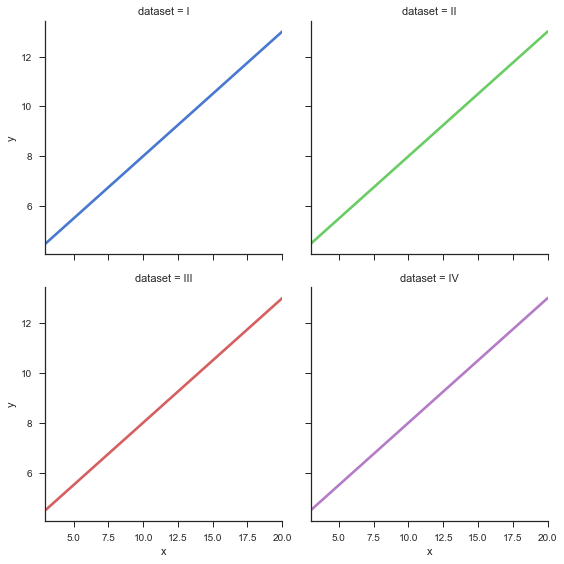

In [106]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombe,
           col_wrap=2, ci=None, palette="muted", size=4, scatter=False,
           scatter_kws={"s": 50, "alpha": 1});

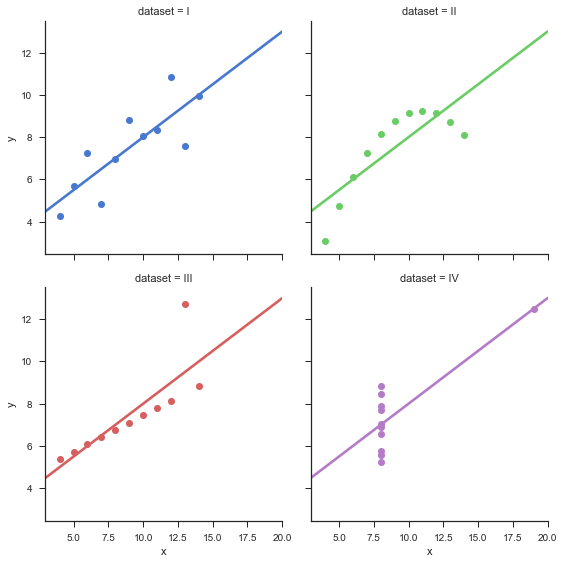

In [107]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombe,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1});

## Visualization

- You can learn a lot from 2D plots of the data:
  - Patterns, trends, outliers, unusual patterns.
  
- We'll use the `matplotlib` library to do most of our basic plotting.
- For fancier plots, you can try `seaborn`.

## Basic plot

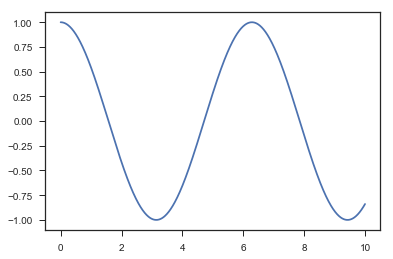

In [108]:
x = np.linspace(0,10,1000)
plt.plot(x, np.cos(x));

In [115]:
iris = sns.load_dataset("iris") # iris flowers, a classic dataset
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Histogram

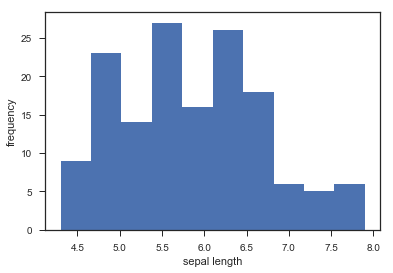

In [110]:
plt.hist(iris['sepal_length'])
plt.xlabel('sepal length')
plt.ylabel('frequency');
# sns.distplot(iris["sepal_length"]);

## Box plot

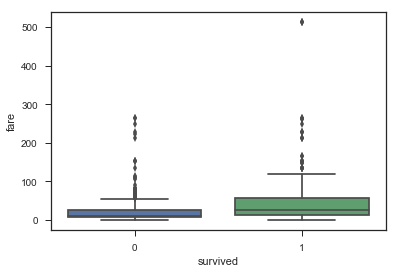

In [111]:
sns.boxplot(x="survived", y="fare", data=titanic);

## Scatterplot

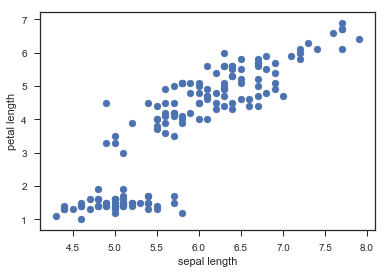

In [112]:
plt.scatter(iris['sepal_length'], iris['petal_length'])
plt.xlabel('sepal length')
plt.ylabel('petal length');

## Scatterplot array

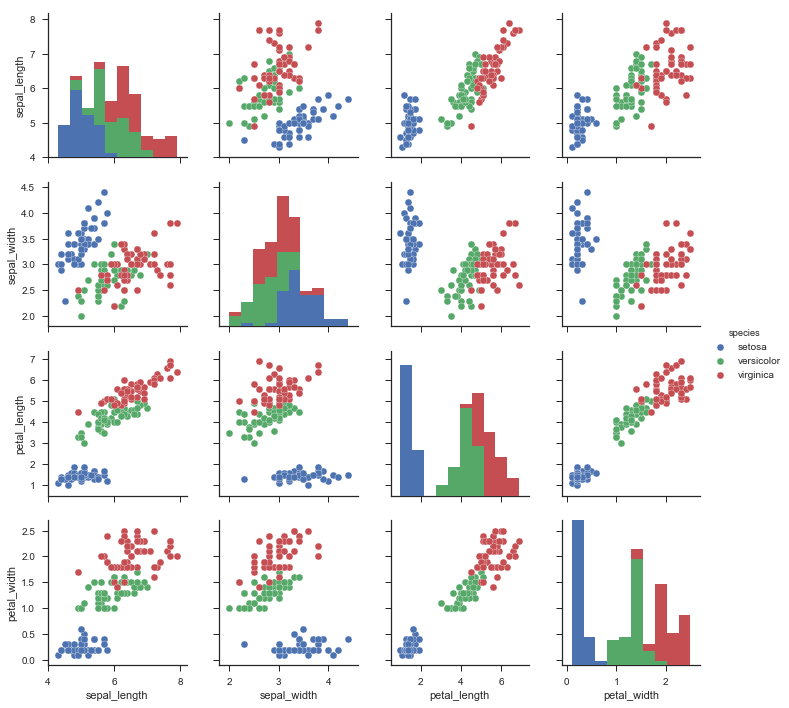

In [113]:
sns.pairplot(iris, hue="species");

## CPSC 340 meta-discussion

- This is the only CPSC 340 lecture on data cleaning and EDA.
- That is not representative of the time typically devoted to these tasks.
  - In fact, data cleaning is often the most time intensive step.
- This is a weakness of the course.
  - But not as bad if you're aware of it.

## Summary

- Typical data mining / ML steps:
  - Involves data collection, preprocessing, analysis, and evaluation.
- Object-feature representation and categorical/numerical features.
  - Transforming non-vector objects to vector representations.
- Feature transformations:
  - To address coupon collecting or simplify relationships between variables.
- Exploring data: 
  - Summary statistics and data visualization.
- Bonus slides: see Mark's slides on GitHub.